# Topic Modeling using Sklearn's Latent Dirichlet Allocation

In [1]:
# Importing relevant libraries

import pandas as pd
import numpy as np
import re
import nltk
import gensim
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Reading the dataset and putting inside a dataframe, there are 12441 comments in total

df = pd.read_csv("../Data/cleaned_comments.csv")
df

,Comment
0,so many questions by commenter unanswered i fo...
1,can i know how much in total for vaccinated tr...
2,why is there a per test in ilia airport it doe...
3,I am for vietnam and i want to flight into sin...
4,how long waiting after swab test
...,...
12436,Passed through Change the other day Was a weir...
12437,How was it
12438,Blu executor Just eerily empty Such a large bu...
12439,Cry to Insider I hope that sub par parody felt...


In [3]:
# Function to preprocess the comments

def corpus2docs(corpus):
    doc = nltk.word_tokenize(corpus)
    docs2 = [w.lower() for w in doc]
    docs3 = [w for w in docs2 if re.search('^[a-z]+$', w)]
    docs4 = [w for w in docs3 if w not in stop_list]
    docs5 = [stemmer.stem(w) for w in docs4]
    return docs5

In [4]:
# Cleaning of comments by using basic preprocessing techniques such as stopword removal and stemming

stop_list = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.porter.PorterStemmer()

text_whole = []
text_whole.extend(df["Comment"])
text_whole

['so many questions by commenter unanswered i for one wanted to know if foreigners who had entered singapore are able to use the vol',
 'can i know how much in total for vaccinated travel lane flight including all the per test for per pax',
 'why is there a per test in ilia airport it does not make sense since a test was already conducted in spore prior to travel the asian gov sure know how to make it difficult for travellers poor malaysians working in spore they have to pay a lot of money and waste so much time before they can get to see their family',
 'I am for vietnam and i want to flight into singapore but then i want to get into malaysia by land is it possible',
 'how long waiting after swab test',
 'so this is only possible for sep and malaysia residents if ism an international tourist can i enter malaysia via the singapore vol',
 'his what about cost summary',
 'do you have to book the per test at ilia before arrival',
 'yes you should',
 'i will land in singapore eth jan am an

In [5]:
# Applying the corpus2docs function onto the text

cleaned_text = []

for comment in text_whole:
    clean_comment = corpus2docs(comment)
    combined = " ".join([word for word in clean_comment])
    cleaned_text.append(combined)
    
cleaned_text

['mani question comment unansw one want know foreign enter singapor abl use vol',
 'know much total vaccin travel lane flight includ per test per pax',
 'per test ilia airport make sens sinc test alreadi conduct spore prior travel asian gov sure know make difficult travel poor malaysian work spore pay lot money wast much time get see famili',
 'vietnam want flight singapor want get malaysia land possibl',
 'long wait swab test',
 'possibl sep malaysia resid ism intern tourist enter malaysia via singapor vol',
 'cost summari',
 'book per test ilia arriv',
 'ye',
 'land singapor eth jan flight koala bumper best way book per test',
 'book got link book two day malaysia flight',
 'would like get info link book repli contact author',
 'much per test',
 'crazi time lock own anytim mani procedur carri trip go back anxiou face sweat',
 'stupid singapor govern open border travel bring old new viru omicron selfish never think other safeti',
 'restrict singaporean malaysian',
 'much info pertain 

In [6]:
# CountVectorizer converts the text documents to a matrix of token counts
vectorizer = CountVectorizer()
sg_vecs = vectorizer.fit_transform(cleaned_text)

# get_feature_names saves all the words, to see the words in each topic later

feature_names = vectorizer.get_feature_names()

In [7]:
# Building the LDA Model with a user defined number of 30 topics
# This may take some time, topics will change slightly whenever the jupyter notebook reruns

sg_lda = LatentDirichletAllocation(n_components = 30, learning_method='online', n_jobs = -1)             
lda_output = sg_lda.fit_transform(sg_vecs)

In [8]:
# Function to display the 30 topics and for each topic we choose the top 15 most frequent words.

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15
display_topics(sg_lda, feature_names, 15)

Topic 0:
flip languag joshua brake warn wink bicycl flop cat ad ko empti mem puppet soul
Topic 1:
day year keep air law two control last next home futur play lost everi almost
Topic 2:
well five go back look singapor done mean one away media wonder south twenti real
Topic 3:
hand right clap vol economi fold plan decis becom scienc provid depend hah discrimin due
Topic 4:
thumb tri govt co best bu hi capabl sponsor achiev amp flight tighten circul ero
Topic 5:
malaysia good thank trade invest la made return week kid profit expert red sinc man
Topic 6:
travel vaccin countri lane open realli close malaysia life must need famili singaporean border mani
Topic 7:
live hundr three one pleas wait pm go problem skin tone way jab medium four
Topic 8:
say peopl need mask parti talk like worker get action tell grin english would guy
Topic 9:
news lot mon cri poor thirti price feet chines seen info water global bag recommend
Topic 10:
think new govern never stupid bring safeti other vote paid mutat

In [9]:
# Set up the environment to display the graphical outputs
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [10]:
# Generate the visuals
visual = pyLDAvis.sklearn.prepare(sg_lda, sg_vecs, vectorizer, mds = 'tsne')

C:\Users\hengx\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\hengx\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
C:\Users\hengx\Anaconda3\lib\site-packages\sklearn

In [11]:
# Save the output to the html file
pyLDAvis.save_html(visual, "final_comments.html")

In [12]:
# Compute the Perplexity for model evaluation. Perplexity = exp(-1. * log-likelihood per word)

print("Perplexity: ", sg_lda.perplexity(sg_vecs))

Perplexity:  2487.4526156992474


In [13]:
# Finding the optimal number of topics, generate the perplexity score up to 30 topics
# This may take some time to run

import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
perplexity_values = []
model_topics = []

for num_topics in range(2, 30, 2):
    sg_lda_x = LatentDirichletAllocation(n_components=num_topics, learning_method='online', n_jobs = -1)
    sg_lda_x.fit_transform(sg_vecs)
    model_topics.append(num_topics)
    model_list.append(sg_lda_x)
    perplexity_values.append(sg_lda_x.perplexity(sg_vecs))
    print("#Topics: " + str(num_topics) + ", Score: " + str(sg_lda_x.perplexity(sg_vecs)))

print(datetime.datetime.now())

2022-04-07 14:05:09.290068
#Topics: 2, Score: 1546.157399633344
#Topics: 4, Score: 1707.4948726461753
#Topics: 6, Score: 1825.1096472407494
#Topics: 8, Score: 1812.880765399606
#Topics: 10, Score: 1934.2987590389891
#Topics: 12, Score: 2046.0452128150846
#Topics: 14, Score: 1977.6756237324562
#Topics: 16, Score: 2140.0888085294814
#Topics: 18, Score: 2108.0717241764078
#Topics: 20, Score: 2191.1251386860517
#Topics: 22, Score: 2219.1488032691186
#Topics: 24, Score: 2360.7031862142508
#Topics: 26, Score: 2414.539029780082
#Topics: 28, Score: 2373.9037464224384
2022-04-07 14:16:45.555922


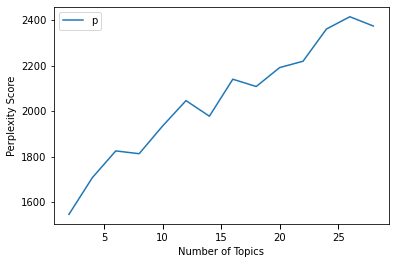

In [19]:
# Generating elbow graph to determine optimal number of topics
# From the elbow graph, it seems like 14 or 17 seems like a good number of topics

import matplotlib.pyplot as plt

limit = 30; start = 2; step = 2;
x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Number of Topics")
plt.tick_params(axis = 'x', length = 5, width = 1)
plt.ylabel("Perplexity Score")
plt.legend(("perplexity_values"), loc = 'best')
plt.show()

In [20]:
# Let us choose the optimal topics to be 14
# Create Document - Topic Matrix, choose the number of topics to be 14, where model_list[6]

lda_output = model_list[10].transform(sg_vecs)

# column names
topicnames = ["Topic " + str(i) for i in range(model_list[10].n_components)]

# index names
docnames = ["Comment " + str(i) for i in range(len(cleaned_text))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 5), columns = topicnames, index = docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
num_doc_to_show = 10  # change this to display the number of documents shown below
df_document_topics = df_document_topic.head(num_doc_to_show).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,dominant_topic
Comment 0,0.003250,0.003250,0.003250,0.003250,0.003250,0.003250,0.003250,0.003250,0.003250,0.003250,0.003250,0.003250,0.003250,0.003250,0.003250,0.003250,0.003250,0.568530,0.003250,0.366530,0.003250,0.003250,17
Comment 1,0.003500,0.003500,0.003500,0.195030,0.003500,0.003500,0.003500,0.003500,0.003500,0.629560,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.108980,0.003500,0.003500,0.003500,9
Comment 2,0.031380,0.001340,0.001340,0.001340,0.001340,0.001340,0.001340,0.001340,0.734780,0.173640,0.001340,0.001340,0.001340,0.001340,0.001340,0.001340,0.001340,0.001340,0.001340,0.036130,0.001340,0.001340,8
Comment 3,0.004550,0.004550,0.004550,0.004550,0.004550,0.004550,0.004550,0.004550,0.197790,0.514950,0.004550,0.004550,0.004550,0.004550,0.004550,0.004550,0.004550,0.200900,0.004550,0.004550,0.004550,0.004550,9
Comment 4,0.009090,0.009090,0.009090,0.009090,0.009090,0.209090,0.009090,0.009090,0.009090,0.609090,0.009090,0.009090,0.009090,0.009090,0.009090,0.009090,0.009090,0.009090,0.009090,0.009090,0.009090,0.009090,9
Comment 5,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.673050,0.180100,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.080420,0.003500,8
Comment 6,0.015150,0.015150,0.015150,0.348480,0.015150,0.015150,0.015150,0.015150,0.015150,0.015150,0.015150,0.015150,0.015150,0.015150,0.015150,0.015150,0.015150,0.015150,0.015150,0.015150,0.015150,0.348480,3
Comment 7,0.007580,0.007580,0.007580,0.007580,0.007580,0.007580,0.007580,0.007580,0.180030,0.668450,0.007580,0.007580,0.007580,0.007580,0.007580,0.007580,0.007580,0.007580,0.007580,0.007580,0.007580,0.007580,9
Comment 8,0.522730,0.022730,0.022730,0.022730,0.022730,0.022730,0.022730,0.022730,0.022730,0.022730,0.022730,0.022730,0.022730,0.022730,0.022730,0.022730,0.022730,0.022730,0.022730,0.022730,0.022730,0.022730,0
Comment 9,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.084220,0.003500,0.460880,0.003500,0.080420,0.003500,0.080420,0.003500,0.157700,0.080420,0.003500,0.003500,0.003500,0.003500,0.003500,9


In [21]:
# Based on the perplexity score, 14 topics is a good number of topics for our dataset
# Rerun the LDA using 14 topics

sg_lda = LatentDirichletAllocation(n_components = 14, learning_method='online', n_jobs = -1)             
lda_output = sg_lda.fit_transform(sg_vecs)

In [23]:
# Function to display the 14 topics with the top 10 most frequent words in each topic

no_top_words = 10
display_topics(sg_lda, feature_names, 10)

Topic 0:
malaysia good world trade invest never everyon thing life one
Topic 1:
travel vaccin singapor countri lane wait minist anoth open situat
Topic 2:
low omicron la use cd compar kid home take welcom
Topic 3:
peopl get singapor covid open vaccin go come case countri
Topic 4:
better know agre total pfizer million today els south word
Topic 5:
state unit first heart like mind tourist via singapor friend
Topic 6:
person go alway way sign johor like malaysia long lee
Topic 7:
one two vaccin thousand hundr twenti five covid three ye
Topic 8:
variant mask mean pm see delta follow call real wear
Topic 9:
face roll laugh floor tear joy hand india eye smile
Topic 10:
thumb realli pleas skin say live well tone speak medium
Topic 11:
right time thank human point talk immun mayb away mon
Topic 12:
singaporean ask place germani put govt english could risk care
Topic 13:
think want money must comment pay read question die tax


## Output of 14 topics, human intepretation of topics

Topic 0: malaysia, good, world, trade, invest, never, everyon, thing, life, one **(cannot be determined)**  
Topic 1: travel, vaccin, singapor, countri, lane, wait, minist, anoth, open, situat **(Singaporeans need to wait longer to travel to other countries)**  
Topic 2: low, omicron, la, use, cd, compar, kid, home, take, welcom **(cannot be determined)**  
Topic 3: peopl, get, singapor, covid, open, vaccin, go, come, case, countri **(Singaporeans contract covid when travellers enter the country)**  
Topic 4: better, know, agre, total, pfizer, million, today, els, south, word **(cannot be determined)**  
Topic 5: state, unit, first, heart, like, mind, tourist, via, singapor, friend **(tourists like to visit Singapore)**  
Topic 6: person, go, alway, way, sign, johor, like, malaysia, long, lee **(need to wait for a long time to visit johor)**  
Topic 7: one, two, vaccin, thousand, hundr, twenti, five, covid, three, ye **(numbers)**  
Topic 8: variant, mask, mean, pm, see, delta, follow, call, real, wear **(mask wearing)**  
Topic 9: face, roll, laugh, floor, tear, joy, hand, india, eye, smile **(facial features and expressions)**  
Topic 10: thumb, realli, pleas, skin, say, live, well, tone, speak, medium **(cannot be determined)**  
Topic 11: right, time, thank, human, point, talk, immun, mayb, away, mon **(cannot be determined)**  
Topic 12: singaporean, ask, place, germani, put, govt, english, could, risk, care **(cannot be determined)**  
Topic 13: think, want, money, must, comment, pay, read, question, die, tax **(payment is required to comment)**

## General observations from the 14 topics

From the output, we can see that most of the topics are overly-generalised. They can be too much of an information for our business users to make informed decisions. Some topics are difficult to determine because the words in each topic are too vastly different. They do not make up an obvious topic. This can be seen in topics 0, 2, 4, 10, 11 and 12.  

There are also too many non-travel related topics which do not contribute meaningfully to our research. Some examples of these topics are topic 7, 9 and 13.